<a href="https://colab.research.google.com/github/davieir4/Data-Science/blob/main/Lista_de_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTÃO 1**: Dados adquiridos e dataframe inspecionado. ✅

In [43]:
#QUESTÃO 1

import pandas as pd

# Use the raw CSV URL
df = pd.read_csv('https://raw.githubusercontent.com/davieir4/Data-Science/main/Online%20Sales%20Data.csv')

print(df.head(5)) #primeiras colunas do dataframe
#negative_units_sold = df.iloc[:, [4]] < 0 #verifica se há valores negativos no df
#print(df[negative_units_sold])



   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


# **QUESTÃO 2.** Pré-processamento de Dados
Limpe os dados lidos no exercício anterior removendo linhas com valores nulos
e convertendo a coluna Data para o tipo datetime. Em seguida, normalize a
coluna Quantidade para que os valores estejam entre 0 e 1.

In [44]:


#QUESTÃO 2

has_nulls = df.isnull().any().any()
print(f"Há valores nulos no DataFrame? {has_nulls}")
print('\n')

from sklearn.preprocessing import MinMaxScaler
qtd = df.iloc[:, [4]] #selecionando apenas a coluna de unidades vendidas
print(qtd.head())
print('\n')

print(qtd.describe())
print('\n')

#normalizando

scaler = MinMaxScaler().fit(qtd)
qtd_scaled = scaler.transform(qtd)
#print(qtd_scaled)

df.iloc[:, [4]] = qtd_scaled
new_qtd = df.iloc[:, [4]]

print(new_qtd.head()) #após a normalização
print('\n')

from datetime import datetime

date = df.iloc[:,[1]]
print(date.head()) #já está como datetime




Há valores nulos no DataFrame? False


   Units Sold
0           2
1           1
2           3
3           4
4           1


       Units Sold
count  240.000000
mean     2.158333
std      1.322454
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max     10.000000


   Units Sold
0    0.111111
1    0.000000
2    0.222222
3    0.333333
4    0.000000


         Date
0  2024-01-01
1  2024-01-02
2  2024-01-03
3  2024-01-04
4  2024-01-05


# 3. Análise Estatística
Calcule a média, mediana, desvio padrão e moda para a coluna Preço do
DataFrame resultante do pré-processamento.

In [45]:


#   QUESTÃO 3

price = df.iloc[:, [5]]

mean_price = price.mean().iloc[0]
median_price = price.median().iloc[0]
std_price = price.std().iloc[0]
mode_price = price.mode().iloc[0].iloc[0]

print('a média é: ' + str(mean_price))
print('a mediana é: ' + str(median_price))
print('o desvio padrão é: ' + str(std_price))
print('a moda é: '+ str(mode_price))

a média é: 236.3955833333333
a mediana é: 89.99
o desvio padrão é: 429.4466949104775
a moda é: 49.99


# **QUESTÃO 4. **  Visualização de Dados
Crie um gráfico de barras utilizando a biblioteca matplotlib ou seaborn que
mostre a quantidade total vendida de cada produto. O eixo x deve representar
os produtos e o eixo y a quantidade total vendida.

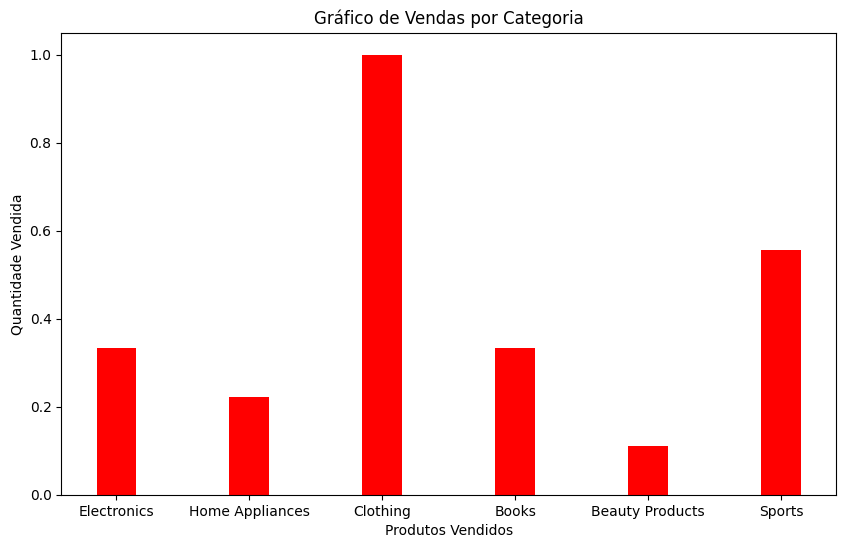

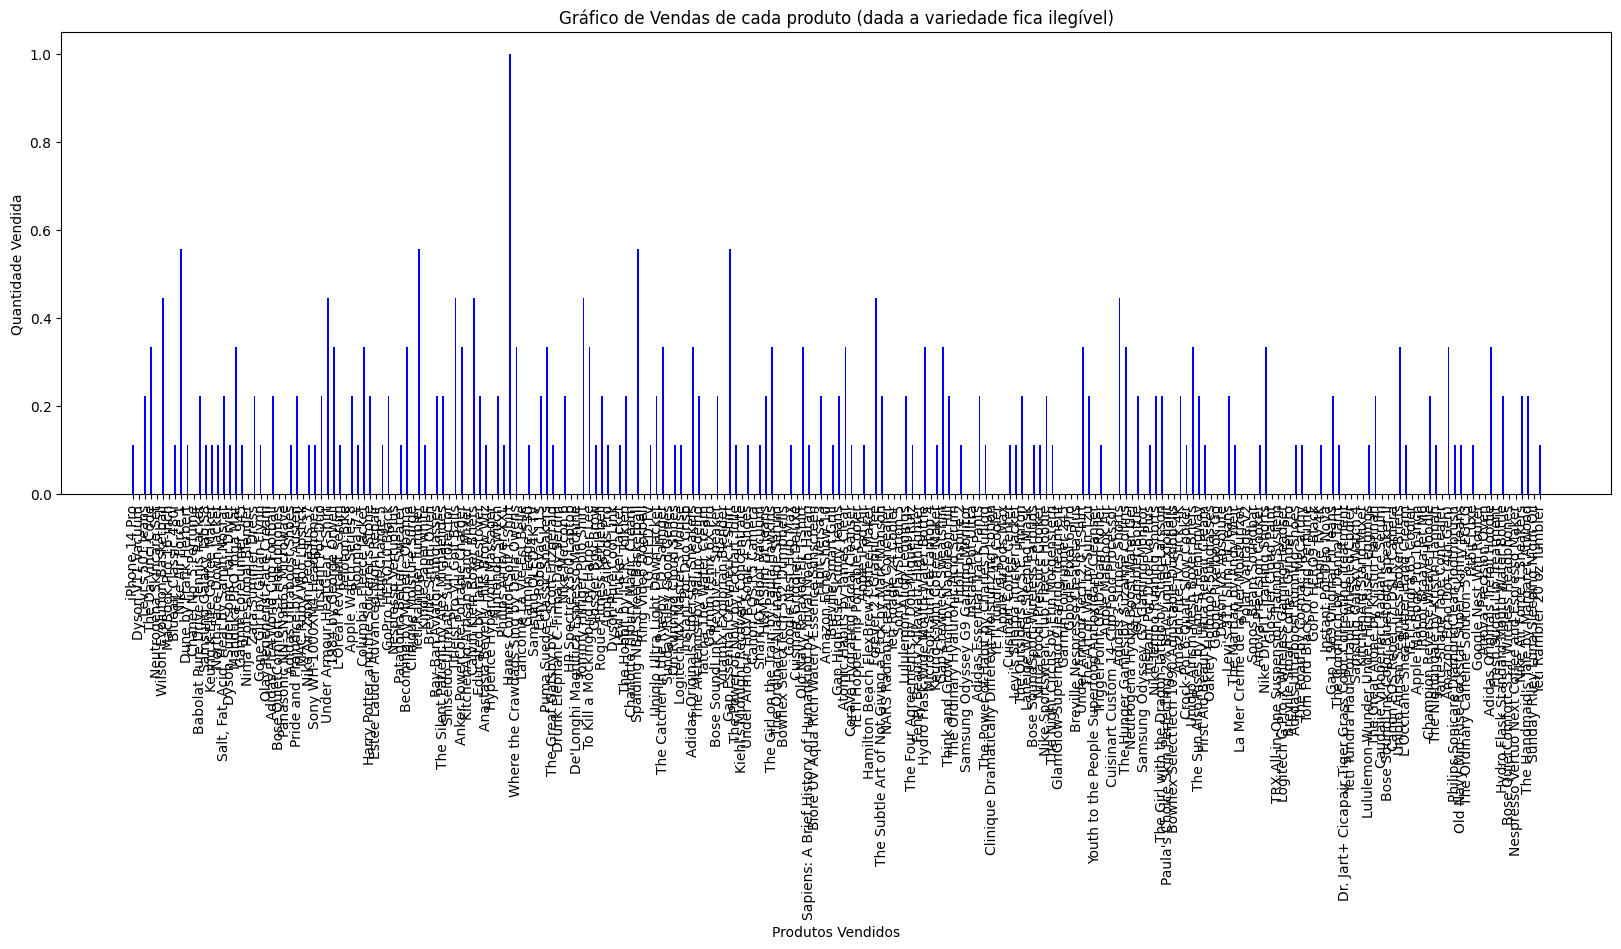

In [46]:
import matplotlib.pyplot as plt

prod_category = df.iloc[:, 2].ravel()

new_qtd1 = new_qtd.values.ravel() #acessando o array presente no dataframe e transformando em unidimensional

plt.figure(figsize=(10, 6))
plt.bar(prod_category, new_qtd1, color='red', width=0.3)
plt.title('Gráfico de Vendas por Categoria')
plt.xlabel('Produtos Vendidos')
plt.ylabel('Quantidade Vendida')
plt.show()

#dada a particularidade do dataframe, vamos preferir lidar com as categorias ao invés de cada produto individualmente


plt.figure(figsize=(20, 6))
plt.bar(df.iloc[:, 3].ravel(), new_qtd1, color='blue', width=0.3)
plt.title('Gráfico de Vendas de cada produto (dada a variedade fica ilegível)')
plt.xlabel('Produtos Vendidos')
plt.xticks(rotation=90)
plt.ylabel('Quantidade Vendida')
plt.show()





# **5. K-Vizinhos Mais Próximos** - Classificação
Usando a mesma base de dados, crie uma coluna binária chamada
Alta_Venda, onde o valor é 1 se a quantidade vendida for maior que a média e
0 caso contrário. Em seguida, crie um modelo de classificação utilizando o
algoritmo K-Vizinhos Mais Próximos (KNN) para prever se uma venda será alta
ou não. Avalie o modelo utilizando a matriz de confusão.

Acurácia do modelo: 85.42%


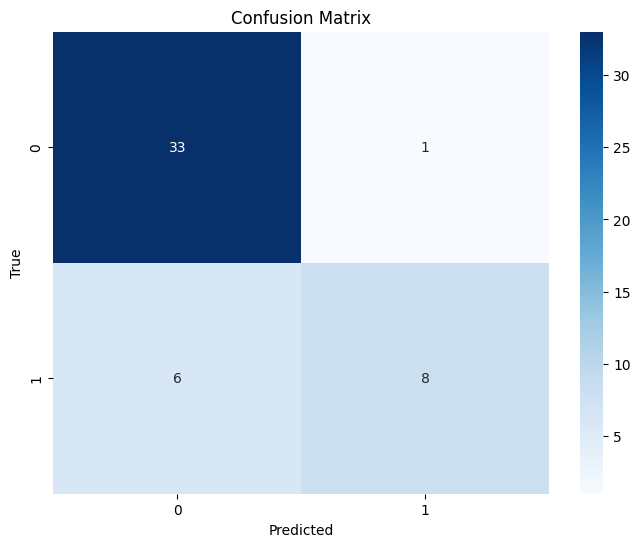

In [54]:

AltaVenda = new_qtd > new_qtd.mean() #verifica se a quantidade é maior que a média e salva como bool
df['Alta_Venda'] = AltaVenda.astype(int) #converte para int e adiciona a coluna


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



x = df.iloc[:, [  4, 5]] #coluna Categoria, Quantidade e preço
y = df.iloc[:, [9]] #coluna Alta_Venda

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train.values.ravel())


y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)

print(f"Acurácia do modelo: {(accuracy*100).round(2)}%")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 6. Agrupamento - K-means
Utilize o algoritmo K-means para agrupar os produtos com base em suas
quantidades vendidas e preços. Determine o número ideal de clusters
utilizando o método do cotovelo (elbow method).

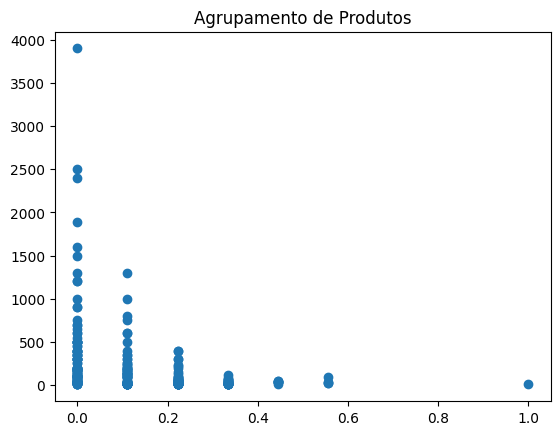

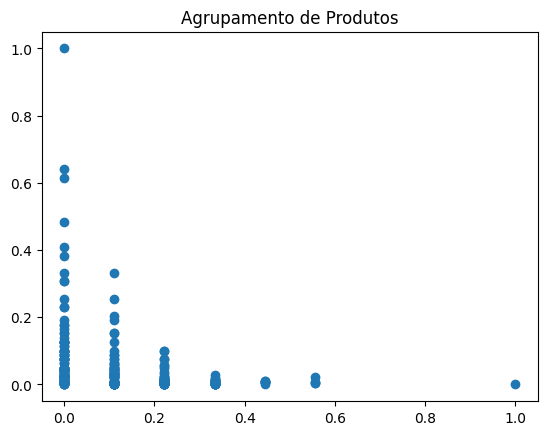

<ipython-input-23-12047705a242>:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  qtd.array = np.array(new_qtd).reshape(-1, 1)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

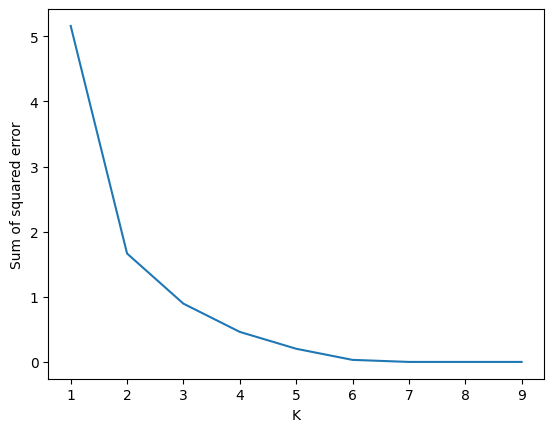

In [23]:
import numpy as np
from sklearn.cluster import KMeans

plt.scatter(new_qtd, price)
plt.title('Agrupamento de Produtos')
plt.show()

scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(price)

plt.scatter(new_qtd, scaled_price)
plt.title('Agrupamento de Produtos')
plt.show()

#elbow method

qtd.array = np.array(new_qtd).reshape(-1, 1)

sse = [] #sum of squared error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(qtd.array, scaled_price) # convert new_qtd to a numpy array and reshape it
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# como podemos ver no gráfico, bons valores de K para se utilizar são 2 ou 3

km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(qtd.array, scaled_price)


#separando clusters

#cluster1 = df[df.Cluster==0]
#cluster2 = df[df.Cluster==1]

#plt.scatter(cluster1.iloc[:, 4], cluster1.iloc[:, 5], color='green')
#plt.scatter(cluster2.iloc[:, 4], cluster2.iloc[:, 5], color='red')
#plt.xlabel('Quantidade Vendida')

# 7. Análise de Clusters
Descreva as características de cada cluster encontrado no exercício anterior.
Identifique quais produtos estão em cada cluster e discuta possíveis razões
para esses agrupamentos.


In [24]:
df['Cluster'] = y_predicted
print(df.iloc[:, 9:])

     Alta_Venda  Cluster
0             0        0
1             0        0
2             1        1
3             1        1
4             0        0
..          ...      ...
235           0        0
236           1        1
237           1        1
238           0        0
239           0        0

[240 rows x 2 columns]




Usando K=2, como nosso "cotovelo" mais acentuado, um comportamento observado foi que os produtos de "alta venda" - isto é, acima da média - ficaram no cluster 1, enquanto os produtos de "baixa venda" no cluster 0. Tendo em vista que a coluna "Alta Venda" é diretamente correlacionada com a quantidade (*Unit Solds*), bem como com o Preço (*Unit Price*), é razoável que esses tipos de produtos formem clusters destintos.

# QUESTÃO 8. Visualização de Clusters
Crie uma visualização que mostre os clusters formados pelo algoritmo
K-means. Utilize um gráfico de dispersão, onde cada ponto representa um
produto, e cores diferentes representam os diferentes clusters.**

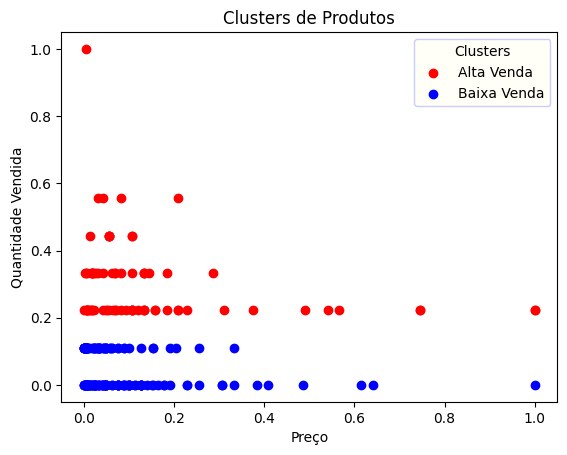

In [25]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]

#print(df1.head())
#print(df2.head())

cScaler = MinMaxScaler()
scaled_price1 = cScaler.fit_transform(df1.iloc[:, [5]]) #escalando o preço cluster1
scaled_price2 = cScaler.fit_transform(df2.iloc[:, [5]]) #escalando o preço cluster2


#plot padronizado

plt.scatter(scaled_price2, df2.iloc[:, 4],  color='red', label ='Alta Venda')
plt.scatter(scaled_price1, df1.iloc[:, 4], color='blue', label='Baixa Venda')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.title('Clusters de Produtos')

# Personalização da legenda
plt.legend(
    loc='upper right',  # Localização da legenda
    fontsize='medium',  # Tamanho da fonte
    title='Clusters',   # Título da legenda
    title_fontsize='medium',  # Tamanho da fonte do título
    fancybox=True,  # Borda arredondada
    framealpha=0.2,  # Transparência do fundo da legenda
    edgecolor='blue',  # Cor da borda da legenda
    facecolor='lightyellow',  # Cor de fundo da legenda
)

plt.show()

Aqui fica clara a separação entre produtos de baixa e alta venda.

# **9. Validação Cruzada**
Realize uma validação cruzada de 5 vezes para o modelo KNN criado no
exercício 5. Compare os resultados obtidos e discuta a estabilidade do modelo.

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

folds = StratifiedKFold(n_splits=5)

print(cross_val_score(knn, x, y.values.ravel(), cv=folds))
precisao = cross_val_score(knn, x, y.values.ravel(), cv=folds)
print(f"Precisão média: {(precisao.mean()*100).round(2)}%")



[0.85416667 0.85416667 0.83333333 0.77083333 0.875     ]
Precisão média: 83.75%


Dada a acurácia apresentada do modelo, podemos dizer que ele é capaz de determinar com uma certa precisão, dado um valor e uma quantidade vendida identificar uma alta venda.

# 10. **Tomada de Decisão baseada em Clustering**
*● Com base nos clusters identificados, escreva um script que sugira
estratégias de marketing. Por exemplo, para cada cluster, decida se é
melhor aumentar ou diminuir o preço dos produtos, lançar promoções
ou focar em marketing específico.
● Aplique essas mudanças aos dados históricos e compare os resultados
antes e depois da aplicação das estratégias usando métodos
estatísticos como teste t, teste de Wilcoxon, ou análise de variância
(ANOVA) para avaliar se as mudanças implementadas tiveram um
impacto significativo nas vendas.
● Gere um relatório resumindo os resultados da análise estatística e
discuta se as estratégias de marketing sugeridas foram eficazes.*

Acredito que esse é o ponto de virada entre o trabalho de um analista e um cientista de Dados, onde o conhecimento adquirido aqui será utilizado com cárater preditivo e a fim de embasar uma tomada de decisão eficiente.

Primeiro vamos definir a correlação entre preço e unidades vendidas:

In [ ]:
correlation = df.iloc[:, [5, 4]].corr()
print(correlation)

            Unit Price  Units Sold
Unit Price    1.000000   -0.308583
Units Sold   -0.308583    1.000000


Note que a relação entre preço e unidades vendidas, é inversamente proporcional, ou seja, como de costume, quanto maior o preço menor as vendas, e esse impacto é de 30,85%.

Agora, que vimos como o preço impacta nas vendas, vamos definir o conceito de "caro" como os produtos com o preço acima da média do nosso DataFrame. Analogamente, os produtos com preço menor ou igual a média serão definidos como baratos.

In [ ]:
isExpensive = df.iloc[:, [5]] > df.iloc[:, [5]].mean()
df['Expensive'] = isExpensive.astype(int)
print(df['Expensive'].head())

0    1
1    1
2    0
3    0
4    0
Name: Expensive, dtype: int64


Quantos produtos foram determinados caros (1 = caro, 0 = barato/na média)?

In [ ]:
print(df['Expensive'].value_counts())


Expensive
0    177
1     63
Name: count, dtype: int64


Quantos são caros e tem alta venda?

In [ ]:
ExpensiveHigh = df[(df['Expensive'] == 1) & (df['Alta_Venda'] == 1)]
print(ExpensiveHigh)

    Transaction ID        Date Product Category  \
36           10037  2024-02-06      Electronics   
42           10043  2024-02-12      Electronics   
60           10061  2024-03-01      Electronics   
96           10097  2024-04-06      Electronics   

                       Product Name  Units Sold  Unit Price  Total Revenue  \
36             Apple Watch Series 8    0.222222      399.99        1199.97   
42               GoPro HERO10 Black    0.222222      399.99        1199.97   
60                  Nintendo Switch    0.222222      299.99         899.97   
96  Bose SoundLink Revolve+ Speaker    0.222222      299.99         899.97   

           Region Payment Method  Alta_Venda  Expensive  
36  North America    Credit Card           1          1  
42  North America    Credit Card           1          1  
60  North America    Credit Card           1          1  
96  North America    Credit Card           1          1  


Com a excessão de 4 produtos *outliers*, preços altos implicam em menos vendas.

Agora, como podemos ajustar o preço a fim de aumentar as vendas?
Para fins de análise, podemos separar as categorias de produtos em clusters distintos e observar seu comportamento quanto a vendas e preço, se estão com *Expensive* e/ou *HighSelling*

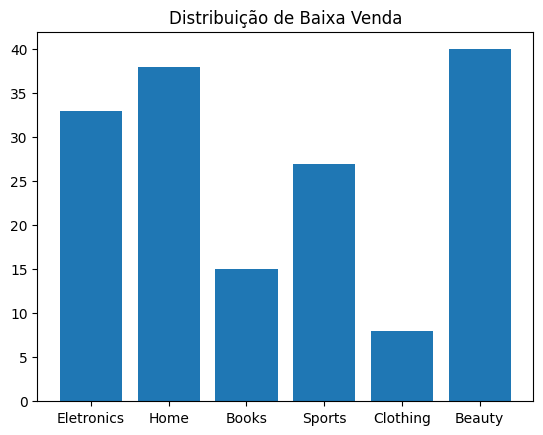

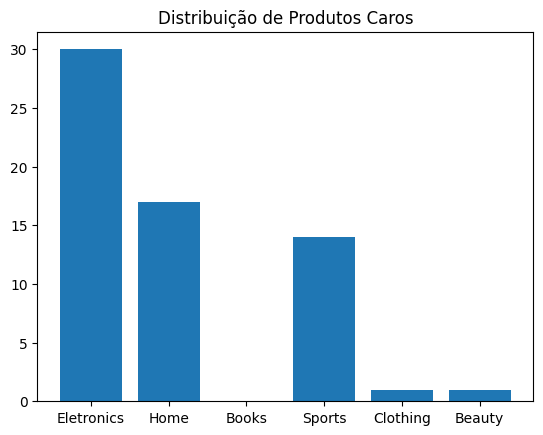

In [ ]:

#Separando o DataFrame em Clusters

Eletronics = df[df['Product Category'] == 'Electronics']
Home = df[df['Product Category'] == 'Home Appliances']
Books = df[df['Product Category'] == 'Books']
Clothing = df[df['Product Category'] == 'Clothing']
Beauty = df[df['Product Category'] == 'Beauty Products']
Sports = df[df['Product Category'] == 'Sports']

#colunas expensive e alta venda (high selling)

eh_Eletro = Eletronics.iloc[:, [9, 10]]
eh_Home = Home.iloc[:, [9, 10]]
eh_Books = Books.iloc[:, [9, 10]]
eh_Clothing = Clothing.iloc[:, [9, 10]]
eh_Beauty = Beauty.iloc[:, [9, 10]]
eh_Sports = Sports.iloc[:, [9, 10]]

#vamos ver qual categoria tem as vendas mais baixas para direcionar uma possível promoção

lowEletro = eh_Eletro[eh_Eletro['Alta_Venda'] == 0].count()
lowHome = eh_Home[eh_Home['Alta_Venda'] == 0].count()
lowBooks = eh_Books[eh_Books['Alta_Venda'] == 0].count()
lowSports = eh_Sports[eh_Sports['Alta_Venda'] == 0].count()
lowClothing = eh_Clothing[eh_Clothing['Alta_Venda'] == 0].count()
lowBeauty = eh_Beauty[eh_Beauty['Alta_Venda'] == 0].count()

barLabels = ['Eletronics', 'Home', 'Books', 'Sports', 'Clothing', 'Beauty']
barHeight = [lowEletro.iloc[0], lowHome.iloc[0], lowBooks.iloc[0], lowSports.iloc[0], lowClothing.iloc[0], lowBeauty.iloc[0]]
plt.bar(barLabels, barHeight)
plt.title('Distribuição de Baixa Venda')
plt.show()

#agora vamos fazer um panorama geral dos preços, vendo há a maior distribuição de produtos caros

expensiveEletro = Eletronics[Eletronics['Expensive'] == 1].count()
expensiveHome = Home[Home['Expensive'] == 1].count()
expensiveBooks = Books[Books['Expensive'] == 1].count()
expensiveSports = Sports[Sports['Expensive'] == 1].count()
expensiveClothing = Clothing[Clothing['Expensive'] == 1].count()
expensiveBeauty = Beauty[Beauty['Expensive'] == 1].count()

costHeight = [expensiveEletro.iloc[0], expensiveHome.iloc[0], expensiveBooks.iloc[0], expensiveSports.iloc[0], expensiveClothing.iloc[0], expensiveBeauty.iloc[0]]
plt.bar(barLabels, costHeight)
plt.title('Distribuição de Produtos Caros')
plt.show()




Analisando os gráficos podemos inferir algumas coisas, a categoria de produtos de beleza não parece ter a baixa procura tão relacionada a altos preços, fugindo da nossa hipótese, contudo representa uma baixa procura necessitando de um melhor marketing. A categoria de eletrônicos figura uma alta distribuição nos gráficos, onde ao mesmo tempo que representa uma baixa venda também representa um grande índice de produtos caros. Produtos de casa também poderiam figurar uma melhor propaganda, pois os preços também não estão tão elevados e possuem procura abaixo da média.


Olhando esses dois gráficos, podemos sugerir algumas medidas, baseada na correlação de altos preços e baixa procura, a exemplo:


Eletronicos: cabe desconto

Casa e Sports: melhor divulgação e desconto

Beleza: Divulgação